In [ ]:
%matplotlib inline
import networkx as nx
import numpy as np 
import pandas as pd 
import itertools
import numpy as np
import networkx as nx
import collections
from networkx.algorithms import community
import matplotlib.pyplot as plt

#Data Import

In [ ]:
import requests

def downdata(url):
  filename = url.split("/")[-1]
  with open(filename, "wb") as f:
      r = requests.get(url)
      f.write(r.content)

downdata("http://snap.stanford.edu/data/email-Eu-core-temporal.txt.gz")
downdata("http://snap.stanford.edu/data/email-Eu-core-temporal-Dept1.txt.gz")
downdata("http://snap.stanford.edu/data/email-Eu-core-temporal-Dept2.txt.gz")
downdata("http://snap.stanford.edu/data/email-Eu-core-temporal-Dept3.txt.gz")
downdata("http://snap.stanford.edu/data/email-Eu-core-temporal-Dept4.txt.gz")

In [ ]:
import shutil
import gzip

with gzip.open('email-Eu-core-temporal.txt.gz', 'rb') as f_in:
    with open('email-Eu-core-temporal.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with gzip.open('email-Eu-core-temporal-Dept1.txt.gz', 'rb') as f_in:
    with open('email-Eu-core-temporal-Dept1.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with gzip.open('email-Eu-core-temporal-Dept2.txt.gz', 'rb') as f_in:
    with open('email-Eu-core-temporal-Dept2.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with gzip.open('email-Eu-core-temporal-Dept3.txt.gz', 'rb') as f_in:
    with open('email-Eu-core-temporal-Dept3.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with gzip.open('email-Eu-core-temporal-Dept4.txt.gz', 'rb') as f_in:
    with open('email-Eu-core-temporal-Dept4.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

#Basic

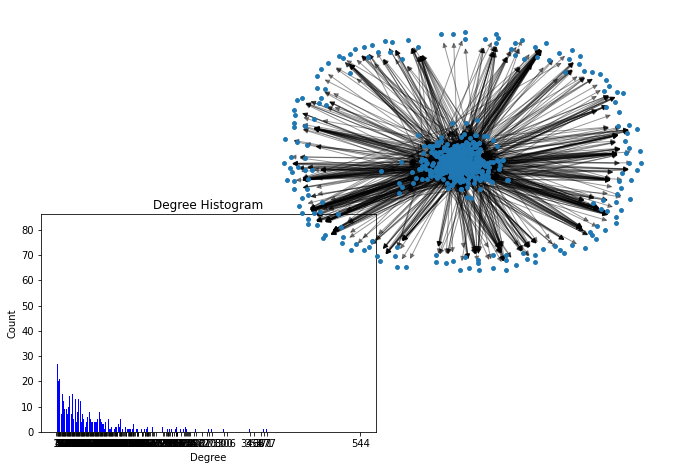

In [ ]:

FielName="email-Eu-core-temporal.txt"

Graphtype=nx.DiGraph()
G = nx.read_edgelist(FielName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.6, 0.6, 1.0, 1.0])
pos = nx.spring_layout(G)
plt.axis('off')
# plt.yscale('log')
# plt.xscale('log')
nx.draw_networkx_nodes(G, pos, node_size=15)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

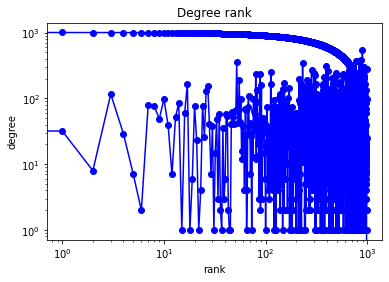

In [ ]:
degree_sequence=sorted(nx.degree(G),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank")
plt.ylabel("degree")
plt.xlabel("rank")


# plt.savefig("degree_dist.png")
plt.show()

In [ ]:
single_outs = 0
list_of_singles = []
for x in sorted(G.nodes()):
    if G.degree(x) == 1:
        single_outs = single_outs + 1
        list_of_singles.append(x)
    elif G.out_degree(x) == 1:
        if x in list_of_singles:
            single_outs = single_outs+1
        else:
            list_of_singles.append(x)
            single_outs = single_outs+1
 
    print ("Node: ", x, " has total #degree: ",G.degree(x), " , In_degree: ", G.out_degree(x)," and out_degree: ", G.in_degree(x))
    
print(single_outs)
print(list_of_singles)

Node:  0  has total #degree:  97  , In_degree:  54  and out_degree:  43
Node:  1  has total #degree:  25  , In_degree:  10  and out_degree:  15
Node:  2  has total #degree:  278  , In_degree:  155  and out_degree:  123
Node:  3  has total #degree:  2  , In_degree:  0  and out_degree:  2
Node:  4  has total #degree:  70  , In_degree:  39  and out_degree:  31
Node:  5  has total #degree:  84  , In_degree:  35  and out_degree:  49
Node:  6  has total #degree:  39  , In_degree:  0  and out_degree:  39
Node:  7  has total #degree:  8  , In_degree:  4  and out_degree:  4
Node:  8  has total #degree:  23  , In_degree:  0  and out_degree:  23
Node:  9  has total #degree:  1  , In_degree:  0  and out_degree:  1
Node:  10  has total #degree:  6  , In_degree:  2  and out_degree:  4
Node:  11  has total #degree:  18  , In_degree:  13  and out_degree:  5
Node:  12  has total #degree:  17  , In_degree:  8  and out_degree:  9
Node:  13  has total #degree:  61  , In_degree:  26  and out_degree:  35
No

#Department Graphs

In [ ]:
def strongweakattract(G):
  print(nx.number_strongly_connected_components(G))
  print(nx.number_weakly_connected_components(G))
  print(nx.number_attracting_components(G))

In [ ]:
FileName="email-Eu-core-temporal-Dept1.txt"
Graphtype=nx.DiGraph()
G1 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))
strongweakattract(G1)

81
9
56


In [ ]:
FileName="email-Eu-core-temporal-Dept2.txt"
Graphtype=nx.DiGraph()
G2 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))
strongweakattract(G2)

45
6
30


In [ ]:
FileName="email-Eu-core-temporal-Dept3.txt"
Graphtype=nx.DiGraph()
G3 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))
strongweakattract(G3)

11
1
10


In [ ]:
FileName="email-Eu-core-temporal-Dept4.txt"
Graphtype=nx.DiGraph()
G4 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))
strongweakattract(G4)

24
6
17


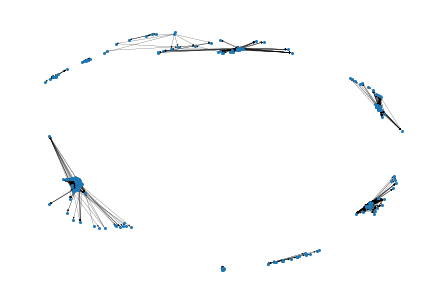

In [ ]:
nx.draw_kamada_kawai(G1, node_size = 4, arrowsize = 4, width = 0.2)
plt.draw()
#plt.show()
plt.savefig('G1.png', dpi=800)

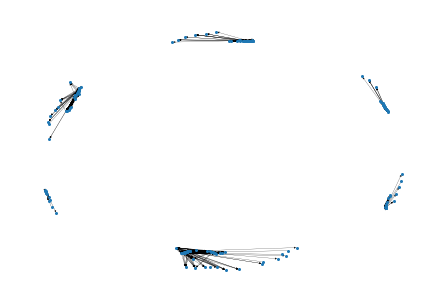

In [ ]:
nx.draw_kamada_kawai(G2, node_size = 4, arrowsize = 4, width = 0.2)
plt.draw()
#plt.show()
plt.savefig('G2.png', dpi=800)

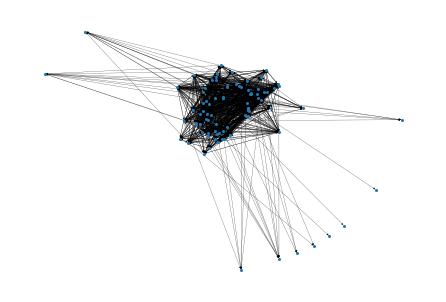

In [ ]:
nx.draw_kamada_kawai(G3, node_size = 4, arrowsize = 4, width = 0.2)
plt.draw()
#plt.show()
plt.savefig('G3.png', dpi=800)

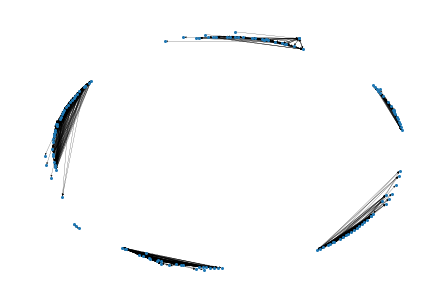

In [ ]:
nx.draw_kamada_kawai(G4, node_size = 4, arrowsize = 4, width = 0.2)
plt.draw()
#plt.show()
plt.savefig('G4.png', dpi=800)

#Community Partition and Clique Percolation

In [ ]:
FileName="email-Eu-core-temporal-Dept1.txt"
Graphtype=nx.Graph()
G1 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

for k in range(5,6):
    c = sorted(list(community.k_clique_communities(G1, k)),key=len)
    print("k="+str(k))
    for x in c:
        print(len(x))
    print("")

k=5
7
10
17
33
37
41
71



In [ ]:
FileName="email-Eu-core-temporal-Dept2.txt"
Graphtype=nx.Graph()
G2 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

for k in range(6,7):
    c = sorted(list(community.k_clique_communities(G2, k)), key=len)
    print("k="+str(k))
    for x in c:
        print(len(x))
    print("")

k=6
9
12
19
22
26
36



In [ ]:
FileName="email-Eu-core-temporal-Dept3.txt"
Graphtype=nx.Graph()
G3 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

for k in range(9,10):
    c = sorted(list(community.k_clique_communities(G3, k)),key=len)
    print("k="+str(k))
    for x in c:
        print(len(x))
    print("")

k=9
9
9
10
51



In [ ]:
FileName="email-Eu-core-temporal-Dept4.txt"
Graphtype=nx.Graph()   
G4 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

for k in range(6,7):
    c = sorted(list(community.k_clique_communities(G4, k)),key=len)
    print("k="+str(k))
    for x in c:
        print(len(x))
    print("")

k=6
6
8
16
20
22
29



In [ ]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [ ]:
FileName="email-Eu-core-temporal.txt"
Graphtype=nx.Graph()   # use net.DiGraph() for directed graph

# How to read from a file. Note: if your egde weights are int, change float to int.
G = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

get_nodes = False
if get_nodes == True:
    # Find the total number of degree, in_degree and out_degree for each node
    for x in G.nodes():
          print ("Node: ", x, " has total #degree: ",G.degree(x), " , In_degree: ", G.out_degree(x)," and out_degree: ", G.in_degree(x))

get_edges = False
if get_edges == True:
    # Find the weight for each node
    for u,v in G.edges():
          print ("Weight of Edge ("+str(u)+","+str(v)+")", G.get_edge_data(u,v))

# print communities within the graph
get_communities = False
if get_communities == True:
    find_communities = community.girvan_newman(G)
    top_level_communities = next(find_communities)
    next_level_communities = next(find_communities)
    print(sorted(map(sorted, next_level_communities)))
  
c = list(community.k_clique_communities(G, 13))
print(c)

[frozenset({256, 2, 260, 517, 133, 648, 266, 782, 912, 790, 30, 416, 166, 294, 168, 425, 946, 435, 948, 949, 52, 439, 313, 699, 573, 61, 447, 586, 74, 332, 77, 974, 721, 214, 984, 472, 90, 602, 730, 607, 356, 868, 743, 232, 104, 111, 112, 500, 885, 759, 762, 765, 126}), frozenset({647, 136, 267, 142, 17, 915, 31, 543, 165, 806, 428, 302, 952, 953, 316, 838, 200, 971, 847, 344, 857, 92, 349, 990, 351, 224, 629}), frozenset({207, 656, 978, 851, 274, 469, 658, 280, 24, 795, 988, 547, 35, 421, 614, 167, 424, 552, 301, 817, 630, 954, 188, 957}), frozenset({704, 73, 458, 844, 723, 918, 216, 25, 672, 41, 684, 558, 48, 499, 565, 758, 956, 318, 319}), frozenset({0, 409, 538, 929, 178, 693, 569, 314, 710, 333, 78, 976, 470, 599, 605, 862, 991, 99, 228, 502, 249, 767}), frozenset({644, 516, 650, 13, 654, 783, 14, 657, 270, 532, 921, 923, 924, 541, 682, 173, 437, 828, 702, 576, 837, 199, 327, 719, 850, 979, 90, 738, 996, 1001, 745, 881, 761, 506, 381}), frozenset({838, 267, 526, 846, 530, 658, 280

14
15
18
19
22
24
27
35
53
116
281


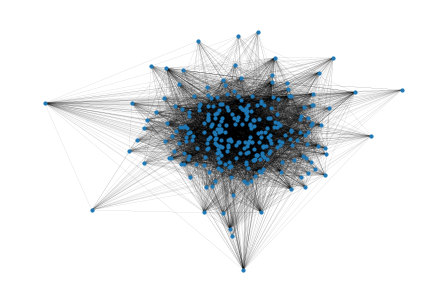

In [ ]:
for x in sorted(c,key=len):
    print(len(x))

K = nx.induced_subgraph(G, c[0].union(c[1]).union(c[2]).union(c[3]).union(c[4]).union(c[5]).union(c[6]).union(c[7]).union(c[8]).union(c[9]))
print(len(K.nodes()))
nx.draw_kamada_kawai(K, node_size = 10, arrowsize = 4, width = 0.05)
plt.draw()
#plt.show()
plt.savefig('K13.png', dpi=800)

number of communities: 8


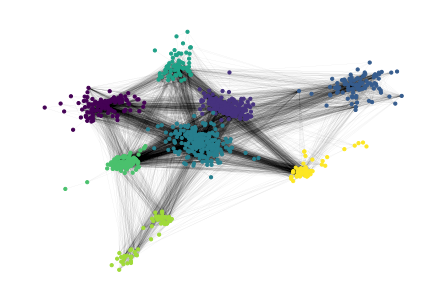

In [ ]:
import community.community_louvain as co
partition = co.best_partition(G)
pos = community_layout(G, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G, pos, node_color=list(partition.values()), node_size = 10, arrowsize = 4, width = 0.02)
plt.savefig('G5.png', dpi=1000)

number of communities: 10


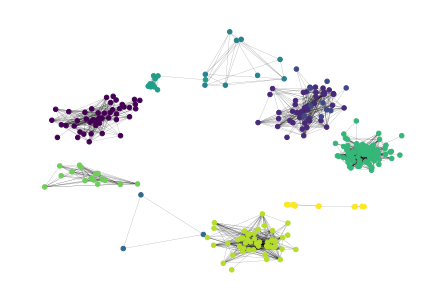

In [ ]:

partition = co.best_partition(G1)
pos = community_layout(G1, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G1, pos, node_color=list(partition.values()), node_size = 20, arrowsize = 4, width = 0.1)
plt.savefig('louvain1.png', dpi=800)

number of communities: 6


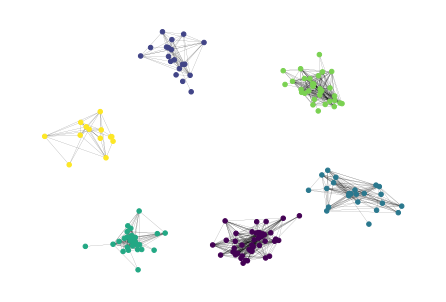

In [ ]:
partition = co.best_partition(G2)
pos = community_layout(G2, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G2, pos, node_color=list(partition.values()), node_size = 20, arrowsize = 4, width = 0.1)
plt.savefig('louvain2.png', dpi=800)

number of communities: 5


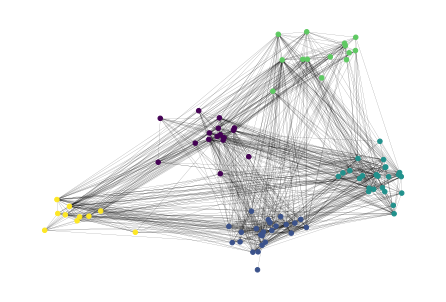

In [ ]:
partition = co.best_partition(G3)
pos = community_layout(G3, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G3, pos, node_color=list(partition.values()), node_size = 20, arrowsize = 4, width = 0.1)
plt.savefig('louvain3.png', dpi=800)

number of communities: 6


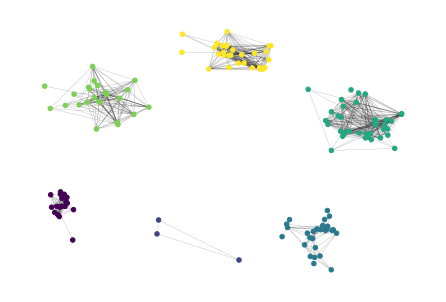

In [ ]:
partition = co.best_partition(G4)
pos = community_layout(G4, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G4, pos, node_color=list(partition.values()), node_size = 20, arrowsize = 4, width = 0.1)
plt.savefig('louvain4.png', dpi=800)

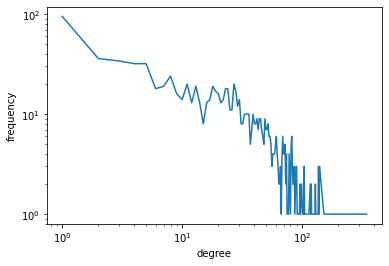

In [ ]:
g = nx.degree_histogram(G)
X = range(len(g))
X = list(filter(lambda a : g[a] != 0 , X)) #get rid of degrees with no corresponding nodes
Y = list(filter(lambda a : a != 0 , g))
plt.xlabel('degree')
plt.ylabel('frequency')
plt.loglog(X,Y)
plt.savefig('degree.png', dpi=800)

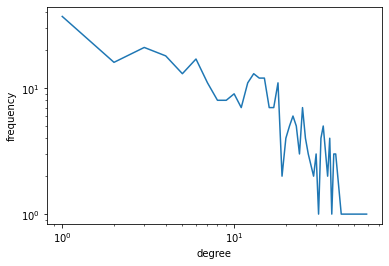

In [ ]:
g = nx.degree_histogram(G1)
X = range(len(g))
X = list(filter(lambda a : g[a] != 0 , X)) #get rid of degrees with no corresponding nodes
Y = list(filter(lambda a : a != 0 , g))
plt.xlabel('degree')
plt.ylabel('frequency')
plt.loglog(X,Y)
plt.savefig('degree1.png', dpi=800)

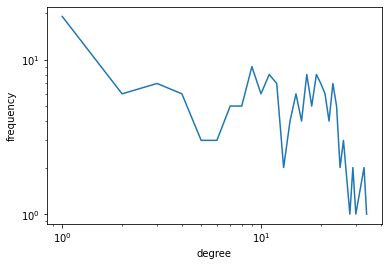

In [ ]:
g = nx.degree_histogram(G2)
X = range(len(g))
X = list(filter(lambda a : g[a] != 0 , X)) #get rid of degrees with no corresponding nodes
Y = list(filter(lambda a : a != 0 , g))
plt.xlabel('degree')
plt.ylabel('frequency')
plt.loglog(X,Y)
plt.savefig('degree2.png', dpi=800)

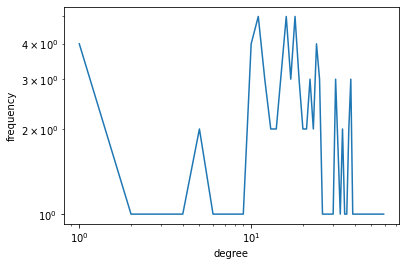

In [ ]:
g = nx.degree_histogram(G3)
X = range(len(g))
X = list(filter(lambda a : g[a] != 0 , X)) #get rid of degrees with no corresponding nodes
Y = list(filter(lambda a : a != 0 , g))
plt.xlabel('degree')
plt.ylabel('frequency')
plt.loglog(X,Y)
plt.savefig('degree3.png', dpi=800)

In [ ]:
g = nx.degree_histogram(G4)
X = range(len(g))
X = list(filter(lambda a : g[a] != 0 , X)) #get rid of degrees with no corresponding nodes
Y = list(filter(lambda a : a != 0 , g))
plt.xlabel('degree')
plt.ylabel('frequency')
plt.loglog(X,Y)
plt.savefig('degree4.png', dpi=800)

#Link Predicition

In [ ]:
FileName="email-Eu-core-temporal.txt"

df = pd.read_csv(FileName, sep = " ", header = None)
df.columns = ["start_node", "end_node", "time_stamp"]

In [ ]:
def train_test_split(df, percentage_of_train):
    mean = np.percentile( df["time_stamp"], percentage_of_train)
    location = (df['time_stamp'] < mean)
    sub_df = df.loc[location]
    location_test = (df['time_stamp'] > mean)
    sub_test = df.loc[location_test]
    sub_test.drop_duplicates(subset=['start_node','end_node'], inplace = True)

    #build a subgraph from dataframe created 
    G_sub=nx.from_pandas_edgelist(sub_df, "start_node", "end_node", ['time_stamp'])

    #convert to undirected for link prediction
    G_sub_undirected = G_sub.to_undirected()
    
    return [G_sub_undirected, sub_test]

In [ ]:
def link_prediction(G_sub_undirected):
    #Preferential Attachment 
    preds = nx.preferential_attachment(G_sub_undirected, ebunch=None)
    PA = []
    for u, v, p in preds:
        PA.append([u,v,p])

    
    #Resource Allocation Index 
    preds_1 = nx.resource_allocation_index(G_sub_undirected, ebunch=None)
    RA = []
    for u, v, p in preds_1:
        RA.append([u,v,p])

    #Adamic-Adar Index
    preds_2 = nx.adamic_adar_index(G_sub_undirected, ebunch=None)
    AAI = []
    for u, v, p in preds_2:
        AAI.append([u,v,p])
    
    #Jaccard_coefficient
    preds_3 = nx.jaccard_coefficient(G_sub_undirected, ebunch=None)
    JC = []
    for u, v, p in preds_3:
        JC.append([u,v,p])
    #print(PA)
        
    return [PA, RA, AAI, JC]

In [ ]:
def evaluation(link_list, sub_test, percentile):
    i = 0
    while i < 4: 
        df_result = pd.DataFrame(link_list[i])
        df_result.columns = ['start_node', 'end_node', 'score']  
        df_result = df_result.drop(df_result[df_result.score == 0].index)
        #print(np.min(df_result["score"]))
        threshold = np.percentile( df_result["score"], percentile)
        if i == 0:
            print("Preferential Attachment:")
        if i == 1: 
            print("Resource Allocation Index: ")
        if i == 2: 
            print("Adamic-adar Index: ")
        if i == 3: 
            print("Jaccard_coefficient: ")
       
        print("Current Threshold Percentile = ", percentile)
        print("Current Threshold Value = ", threshold)
        link_location = (df_result['score'] > threshold)
        df_link = df_result.loc[link_location]
        number_edge_in_test = sub_test.shape[0]
        number_edge_in_prediction = df_link.shape[0]
        df_merged = pd.merge(df_link, sub_test , how='inner', on=['start_node','end_node'])
        df_merged.drop_duplicates(subset=['start_node','end_node'], inplace = True)
        number_edge_in_both =df_merged.shape[0]
        if number_edge_in_prediction == 0:
            print("No links predicted")
            print("----------------------------------------------------------------------------")
            i = i + 1
        else:
            print("number_edge_in_test,number_edge_in_prediction,number_edge_in_both are: ")
            print(number_edge_in_test,number_edge_in_prediction,number_edge_in_both)
            #false positive - prediction: exist, Actual: does not exist 
            print("False Positive Rate: ", (number_edge_in_prediction - number_edge_in_both)/number_edge_in_prediction)
            #false negative - prediction: does not exist, Actual: exist 
            print("False Positive Rate: ", (number_edge_in_test - number_edge_in_both)/number_edge_in_test)
            #Accuracy - percentage of links exsit in original data and is predicted by algorithm
            print("Accuracy: ", number_edge_in_both/number_edge_in_test)
            print("----------------------------------------------------------------------------")
            i = i + 1

In [ ]:
def evaluation_data(link_list, sub_test, percentile, k):
    PA_stat = []
    RAI_stat = []
    AAI_stat = []
    JC_stat = []
    i = 0
    tracker = 0
    split = 5
    while i < 5: 
        df_result = pd.DataFrame(link_list[i-1])
        df_result.columns = ['start_node', 'end_node', 'score']  
        df_result = df_result.drop(df_result[df_result.score == 0].index)
        #print(np.min(df_result["score"]))
        threshold = np.percentile( df_result["score"], percentile)
        link_location = (df_result['score'] > threshold)
        df_link = df_result.loc[link_location]
        number_edge_in_test = sub_test.shape[0]
        number_edge_in_prediction = df_link.shape[0]
        df_merged = pd.merge(df_link, sub_test , how='inner', on=['start_node','end_node'])
        df_merged.drop_duplicates(subset=['start_node','end_node'], inplace = True)
        number_edge_in_both =df_merged.shape[0]
        if number_edge_in_prediction == 0:
            print("No links predicted")
            print("----------------------------------------------------------------------------")
            i = i + 1
        else:
            i = i + 1
            if i == 1:
                PA_stat.append([i, k*0.1, percentile,number_edge_in_both/number_edge_in_test, number_edge_in_both/number_edge_in_prediction])
            if i == 2: 
                RAI_stat.append([i, k*0.1, percentile,number_edge_in_both/number_edge_in_test, number_edge_in_both/number_edge_in_prediction])
            if i == 3: 
                AAI_stat.append([i, k*0.1, percentile,number_edge_in_both/number_edge_in_test, number_edge_in_both/number_edge_in_prediction])
            if i == 4 : 
                JC_stat.append([i, k*0.1, percentile,number_edge_in_both/number_edge_in_test, number_edge_in_both/number_edge_in_prediction])

    
    return PA_stat, RAI_stat, AAI_stat, JC_stat

In [ ]:
result_data = []
for x in range (5, 9):
    print("current training size is: ", x*10)
    DF = train_test_split(df, x*0.1)
    result = link_prediction(DF[0])
    for y in range (0, 9):
        result_data.append(evaluation_data(result, DF[1], y*10, x))

current training size is:  50


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


current training size is:  60
current training size is:  70
current training size is:  80


In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

PA = []
for i in range (0,36):
    PA.append(result_data[i][0][0])
headers = ["0","Training", "Threshold","Accuracy", "Positive Rate"]
PA = pd.DataFrame(PA, columns = headers)
PA.drop(['0'], axis = 1)

,Training,Threshold,Accuracy,Positive Rate
0,0.5,0,0.071466,0.360812
1,0.5,10,0.064307,0.361111
2,0.5,20,0.056183,0.358481
3,0.5,30,0.048703,0.361385
4,0.5,40,0.040700,0.367332
5,0.5,50,0.034748,0.368443
6,0.5,60,0.028353,0.378422
7,0.5,70,0.021597,0.394563
8,0.5,80,0.012186,0.385006
9,0.6,0,0.078812,0.344840


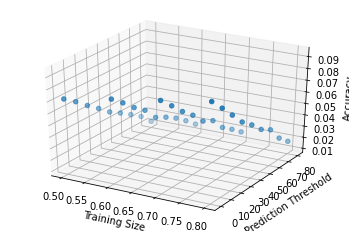

<Figure size 432x288 with 0 Axes>

In [ ]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(PA['Training'], PA['Threshold'], PA['Accuracy'])
threedee.set_xlabel('Training Size')
threedee.set_ylabel('Prediction Threshold')
threedee.set_zlabel('Accuracy')
plt.show()
plt.savefig('temp.PNG', figsize=(100,80))